# TP2: Filtres numériques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## 1. Type du filtre
C'est un filtre RII de type passe-bande entre les deux fréquences: 1KHz et 3KHz

## 2. Calcul des fréquences normalisées de ce filtre
Elles sont calculées suivant la formule suivante: 

$$_\text{Fréquence de coupure normalisée} = \frac{\text{Fréquence de coupure}}{\text{Fréquence maximale}} = \frac{f_c}{f_{max}}$$

Pour calculer la fréquence maximale, on utilise le théorème de Shannon:

$$f_e \geq 2f_{max}$$

$$f_{max} \leq \frac{f_e}{2}$$

Donc, on prend la borne supérieure de cette inégalité:

$$f_{max} = \frac{f_e}{2}$$


In [2]:
# Paramètres du filtre
order = 4  # Ordre du filtre
f_e = 8000  # Fréquence d'échantillonnage en Hz
f_c1 = 1000  # Fréquence de coupure 1 en Hz
f_c2 = 3000  # Fréquence de coupure 2 en Hz

# Calcul des fréquences de coupure normalisées
f_max = f_e / 2
f_c1_normalized = f_c1 / f_max
f_c2_normalized = f_c2 / f_max

print("Fréquence de coupure 1 normalisée: ", f_c1_normalized)
print("Fréquence de coupure 2 normalisée: ", f_c2_normalized)

Fréquence de coupure 1 normalisée:  0.25
Fréquence de coupure 2 normalisée:  0.75


## 3. Trouver les coefficients $a_i$ et $b_i$ du filtre RII

In [3]:
# Fonction pour calculer a et b
def coef(order: int, fc1_normalized: int, fc2_normalized: int):
    return signal.butter(order, [fc1_normalized, fc2_normalized], btype='bandpass')

# Calcul des coefficients du filtre Butterworth
b, a = coef(order, f_c1_normalized, f_c2_normalized)

# Affichage des coefficients
print("Coefficients bi :", b)
print("Coefficients ai :", a)

Coefficients bi : [ 0.09398085  0.         -0.37592341  0.          0.56388511  0.
 -0.37592341  0.          0.09398085]
Coefficients ai : [ 1.00000000e+00 -4.44089210e-16 -2.77555756e-16  2.22044605e-16
  4.86028822e-01 -5.55111512e-17 -5.72458747e-17 -1.73472348e-18
  1.76648009e-02]


## 4. Trace de la réponse impulsionnelle $h(n)$ (avec 50 échantillons)

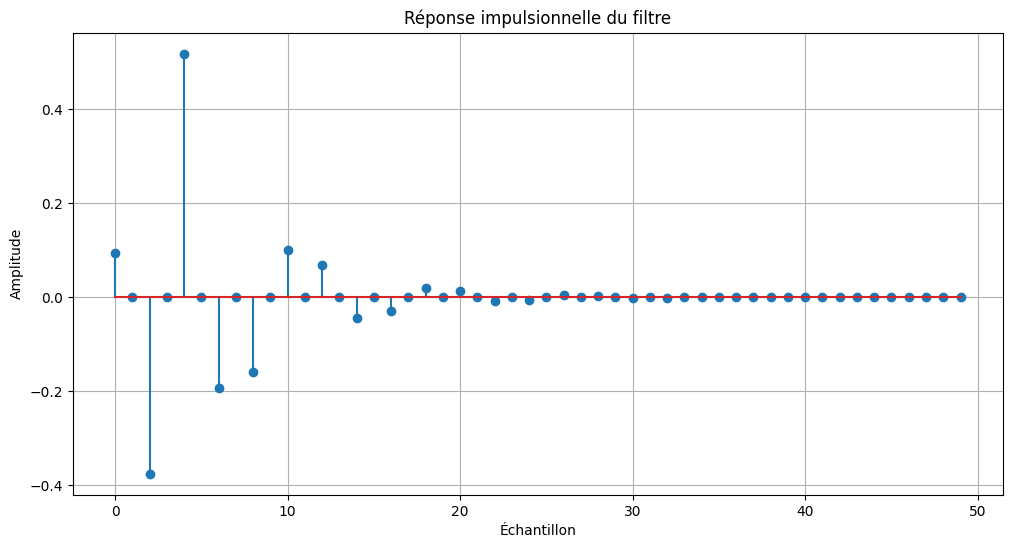

In [4]:
# Réponse impulsionnelle du filtre (50 échantillons)
impulse_response = signal.dimpulse((b, a, 1), n=50)

# dirac = np.zeros(50)
# dirac[0] = 1
# impulse_response = signal.lfilter(b, a, dirac)

# Tracé de la réponse impulsionnelle
plt.figure(figsize=(12, 6))
plt.stem(impulse_response[0], impulse_response[1][0])
# plt.stem(impulse_response)
plt.title("Réponse impulsionnelle du filtre")
plt.xlabel("Échantillon")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

## 5. Trace de la fonction de transfert $H(f)$

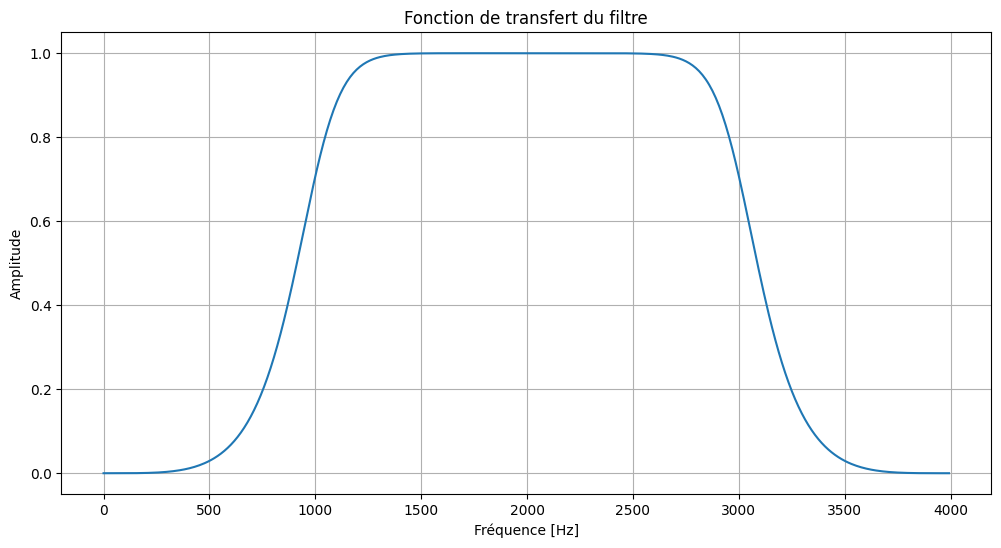

In [5]:
# Réponse en fréquence du filtre
w, h = signal.freqz(b, a, fs=f_e)

# Tracé de la fonction de transfert
plt.figure(figsize=(12, 6))
plt.plot(w, np.abs(h))
plt.title('Fonction de transfert du filtre')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


## 6. Effet de l'augmentation de l'ordre sur la courbe
On remarque que l'augmentation de l'ordre du filtre fait en sorte de diminuer les deux bandes de transition de la fonction de transfert rapprochant ainsi encore plus le filtre du cas idéal.
Cependant, un très grand ordre du filtre (>35) fait apparaitre des cas intéressants:
1. Il y a des ordres pour lequels le filtre se transforme en un filtre selectif d'une seule fréquence.
2. D'autres pour lesquels il devient instable avec des amplitudes > 1, et donc pour certaines fréquences sera selectif mais aussi amplifieur.
3. D'autres (quand N très grand) où l'amplitude -> 0 et donc ce filtre élimine n'importe quel signal.  

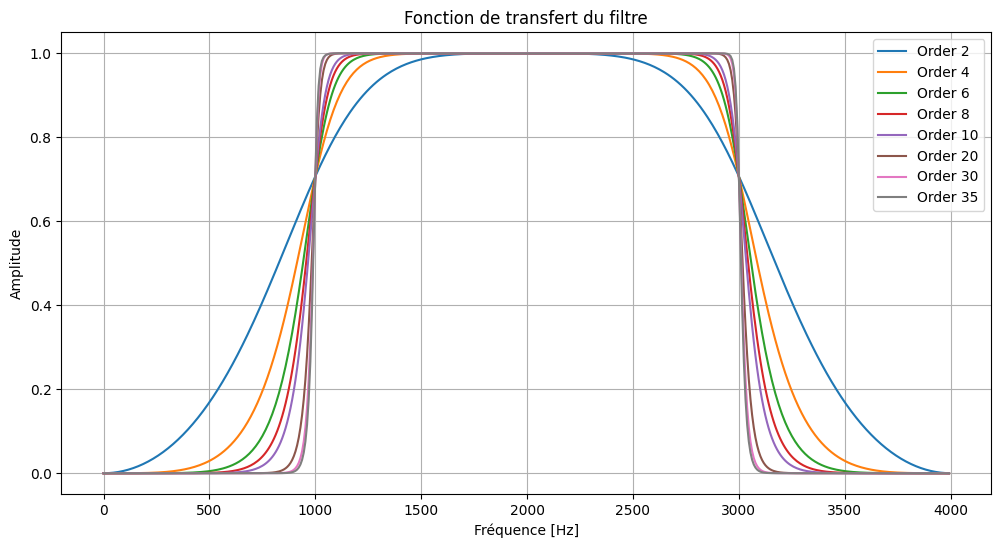

In [6]:
orders = [2, 4, 6, 8, 10, 20, 30, 35]
plt.figure(figsize=(12, 6))
for order in orders:
    b, a = coef(order, f_c1_normalized, f_c2_normalized)
    w, h = signal.freqz(b, a, fs=f_e)
    plt.plot(w, np.abs(h), label=f'Order {order}')

plt.title('Fonction de transfert du filtre')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

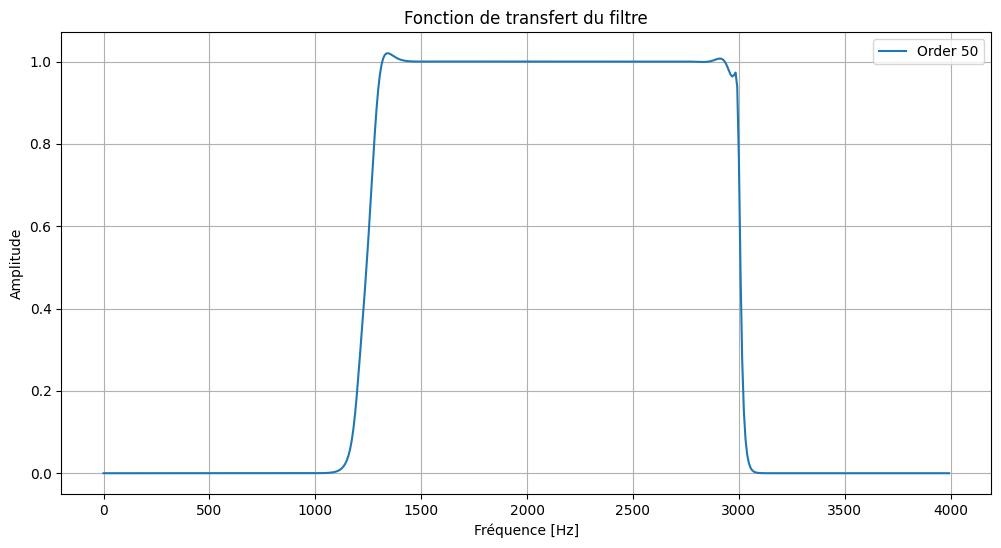

In [7]:
order = 50
plt.figure(figsize=(12, 6))
b, a = coef(order, f_c1_normalized, f_c2_normalized)
w, h = signal.freqz(b, a, fs=f_e)

plt.plot(w, np.abs(h), label=f'Order {order}')
plt.title('Fonction de transfert du filtre')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()